In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path="/content/drive/MyDrive/diabetes_prediction_dataset.csv"
df=pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['gender', 'smoking_history'], dtype='object')


In [ ]:

for col in df.select_dtypes(include=['object', 'category']):
    df[col] = df[col].astype('category').cat.codes
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
df = pd.DataFrame(df)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Replace missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)
print(df)

Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              

In [ ]:
# Split the data into 80-20 train-test split

X = df.drop(['diabetes'], axis=1) # features
y = df['diabetes'] # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier Accuracy: 0.97175


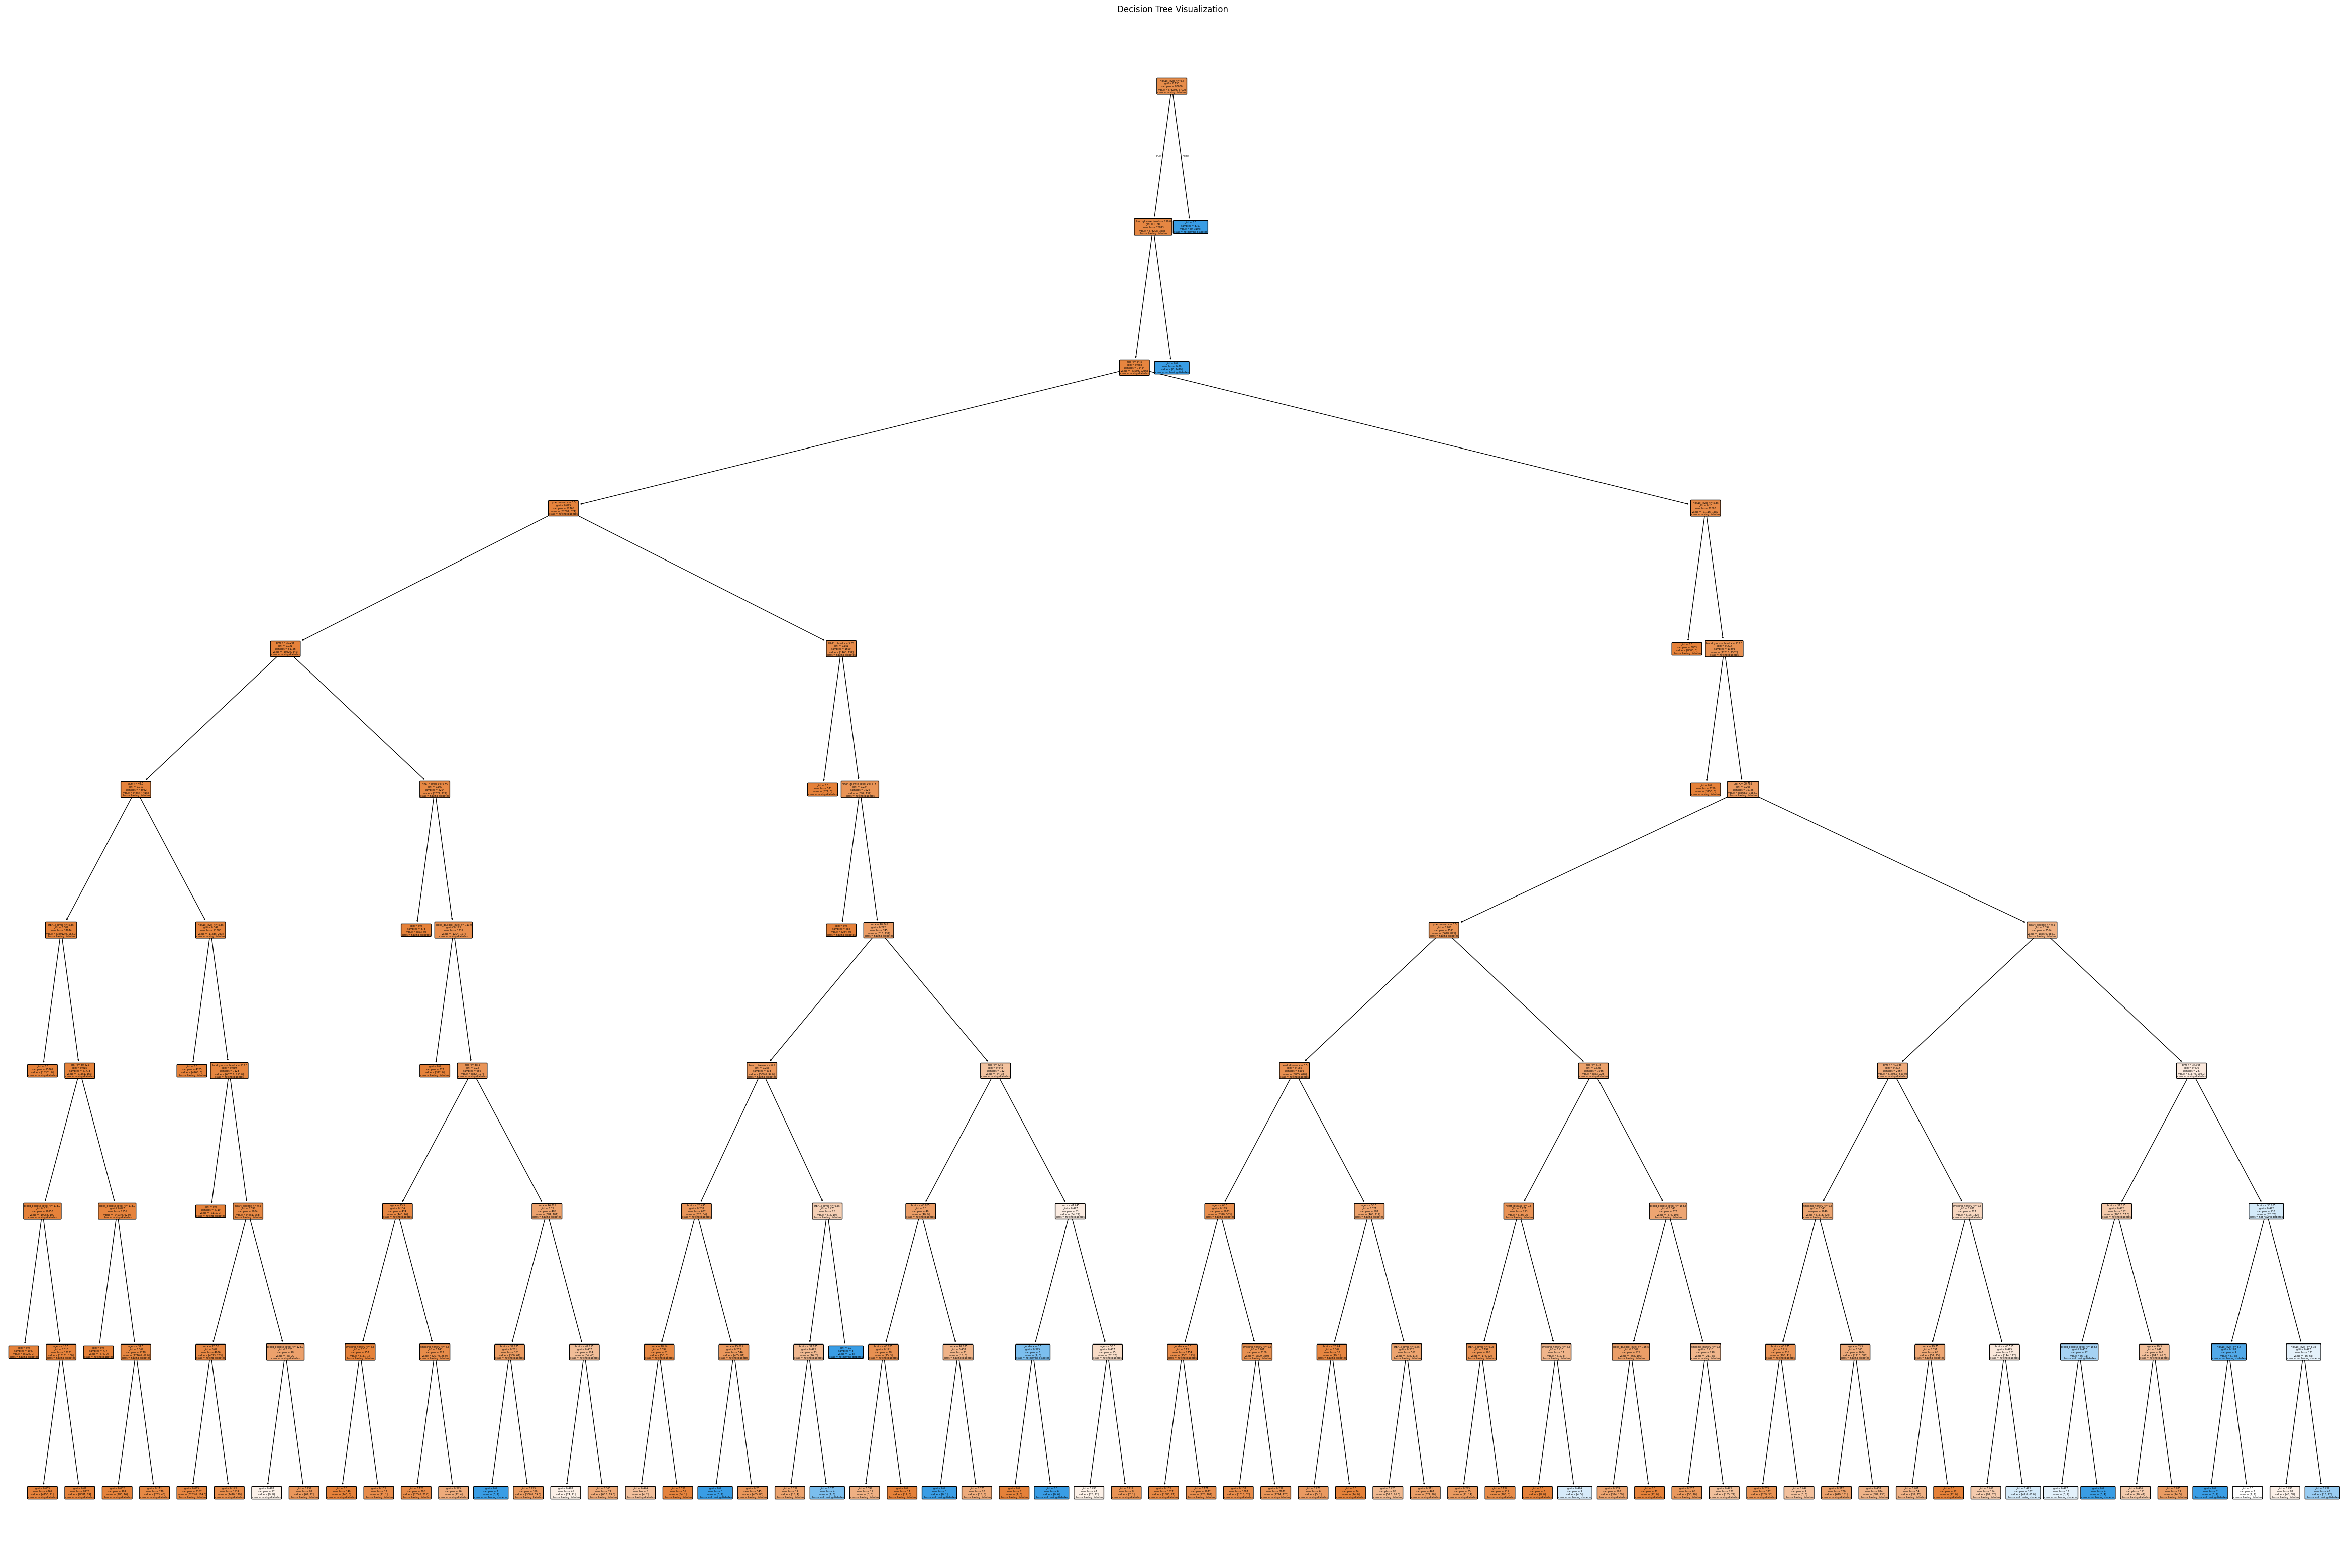

In [ ]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
#accuracy = no.of correctly predicted data / total test data

# Visualize the Decision Tree
plt.figure(figsize=(60, 40))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['having diabetes', 'not having diabetes'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Random Forest Classifier Accuracy: 0.97215


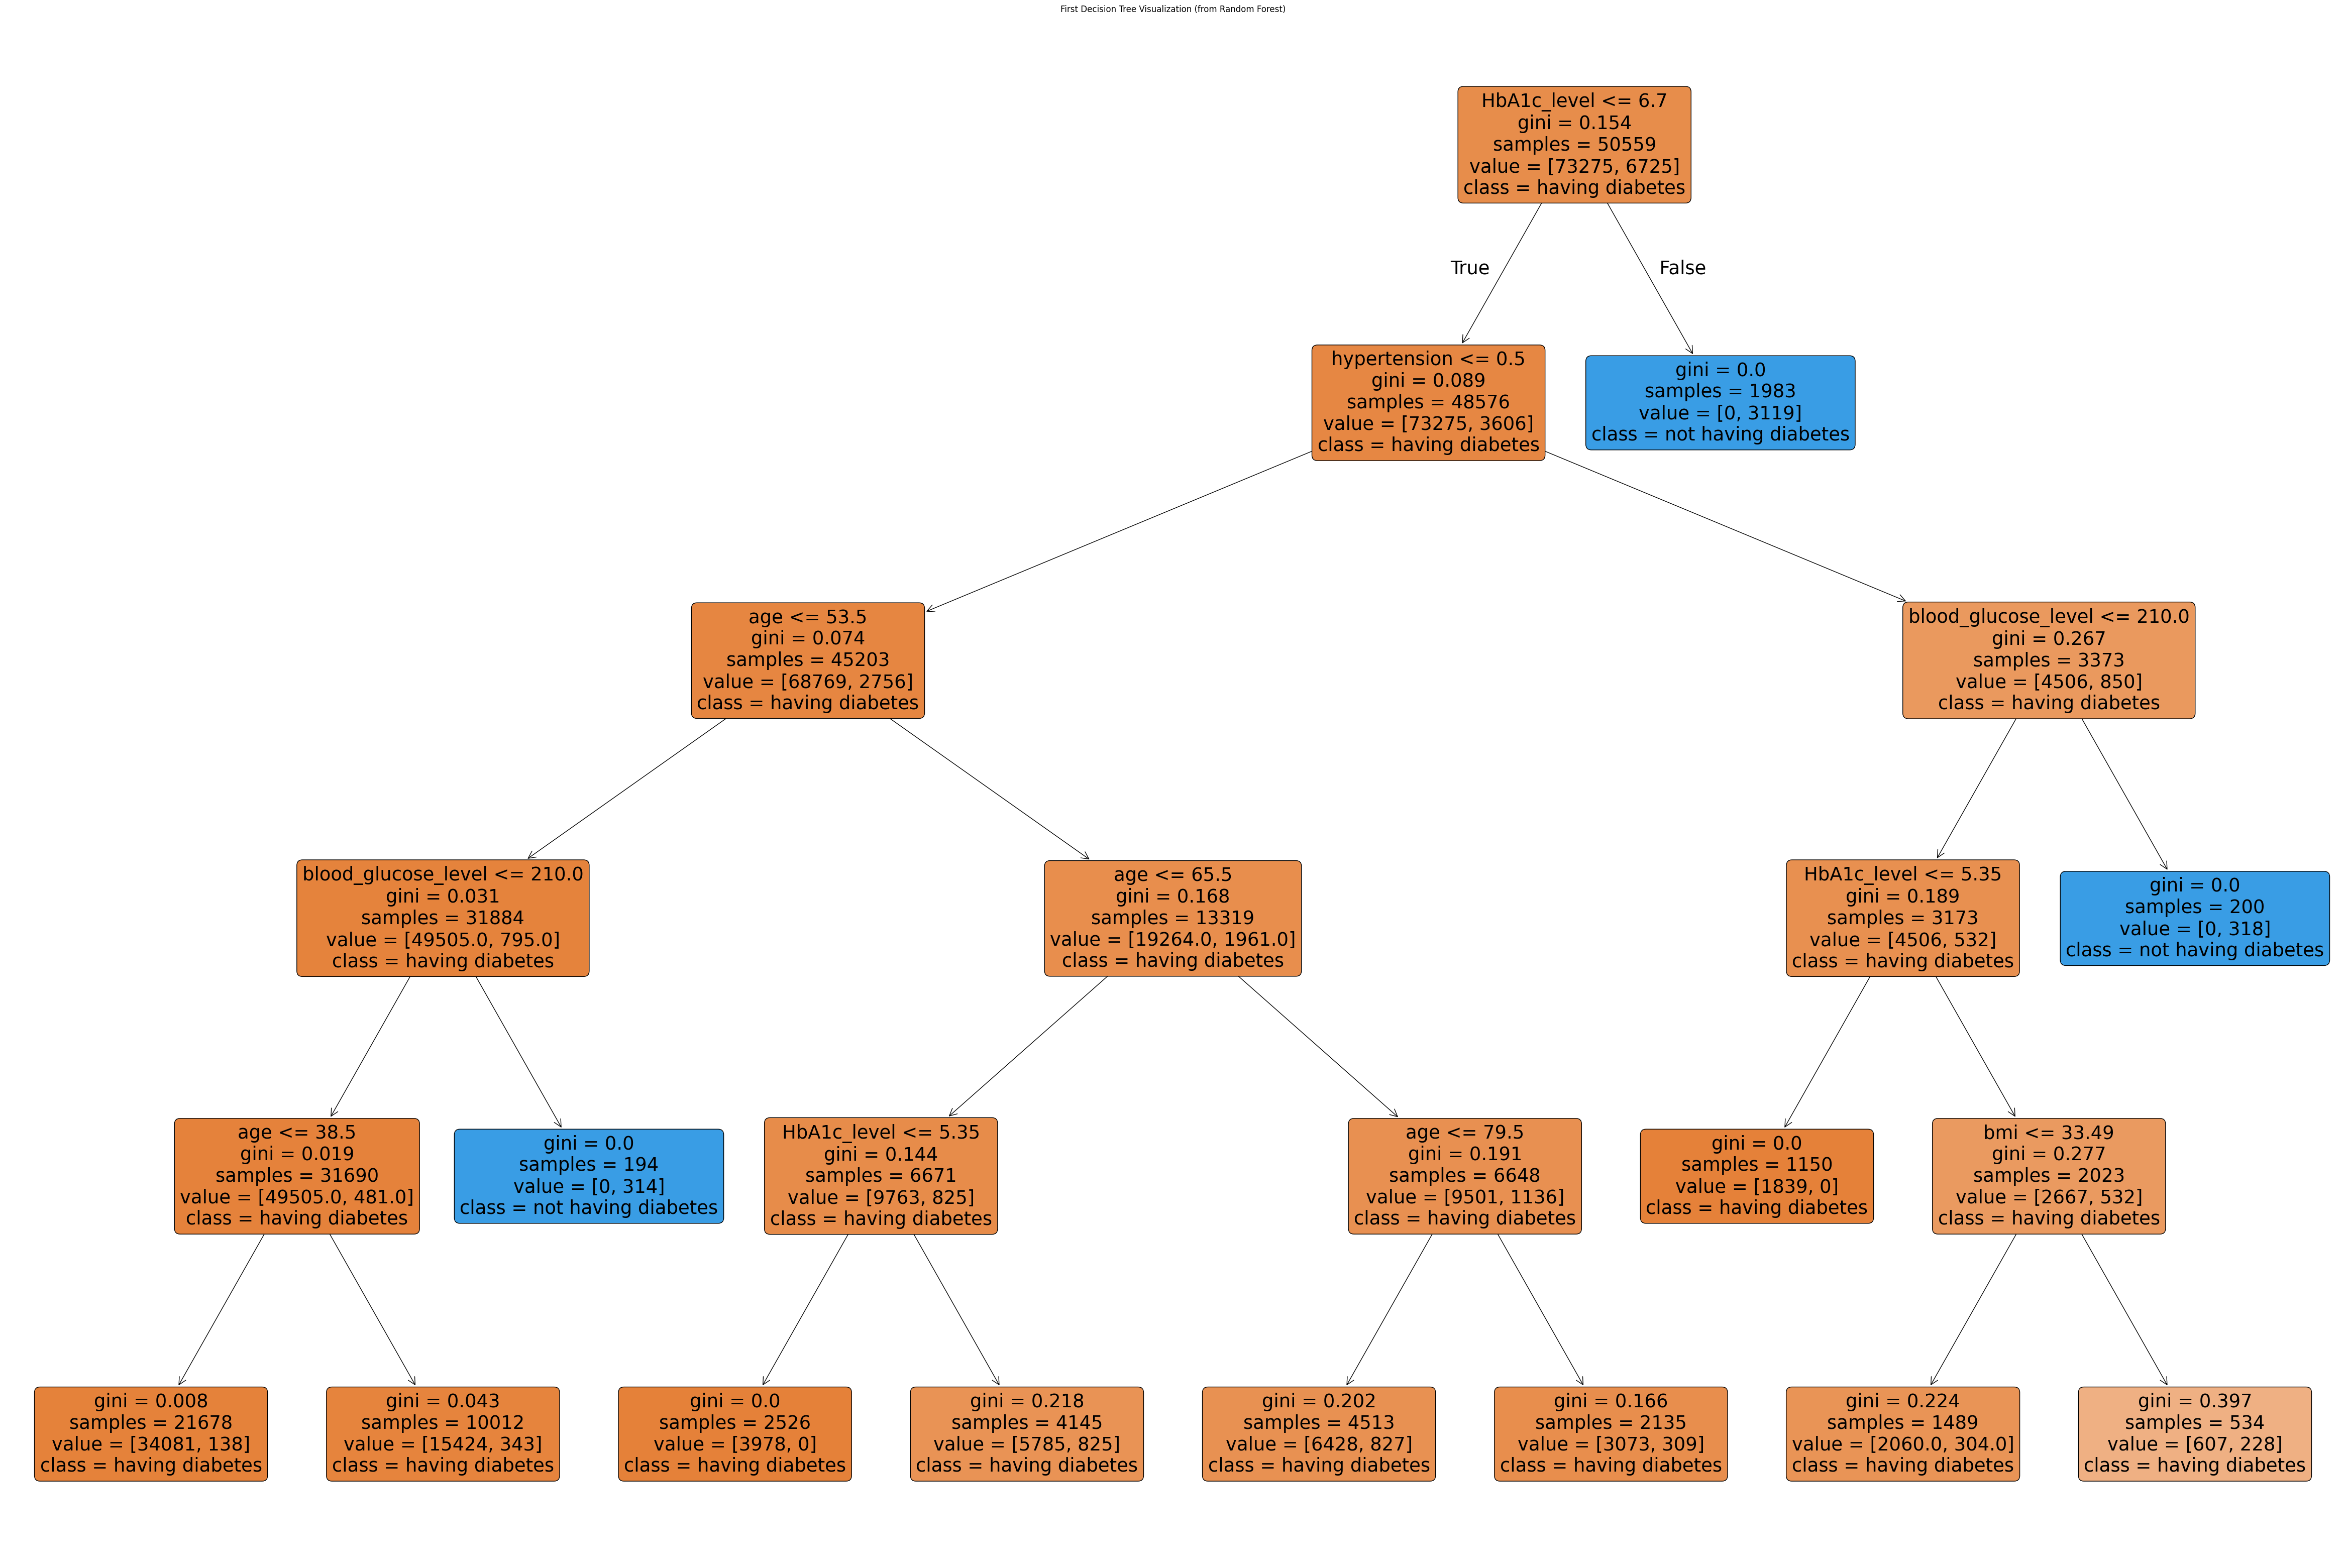

In [ ]:
# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 5, criterion='gini', bootstrap=True, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

# Visualize one of the decision trees (first tree) in the Forest
plt.figure(figsize=(60, 40))
plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, class_names=['having diabetes', 'not having diabetes'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()

In [ ]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.970
Accuracy score (validation): 0.970


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
k = 5  # choose a different k value
knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96
